**Problem 1 - Probability numbers, stick or switch**

In [25]:
from random import seed
from random import random
import numpy as np

# Definining initial values for the following:
# Number of rounds to simulate (for example 10000)
# Number of stick wins
# Number of switch wins
# i variable used in loops
rounds = 10000
stick_wins = 0
switch_wins = 0
i = 0

while i < rounds:
    boxes = [10, 10, 100]
    np.random.shuffle(boxes)
    chosen_box = np.random.choice([0, 1, 2])

    # Open a box with $10
    open_box = next(i for i in range(3) if i != chosen_box and boxes[i] == 10)

    # Determine the other box to switch to
    other_box = next(i for i in range(3) if i != chosen_box and i != open_box)

    # Check if the chosen box contains $100
    # If it contains, the number of stick wins will increase
    # If it doesn't contain, the number of switch wins will increase
    if boxes[chosen_box] == 100:
        stick_wins += 1
    else:
        switch_wins += 1

    i += 1

In [28]:
# Calculate and print probabilities for stick and switch
stick_prob = stick_wins / rounds
switch_prob = switch_wins / rounds
print("Stick probability =", stick_prob)
print("Switch probability =", switch_prob)

Stick probability = 0.334
Switch probability = 0.666


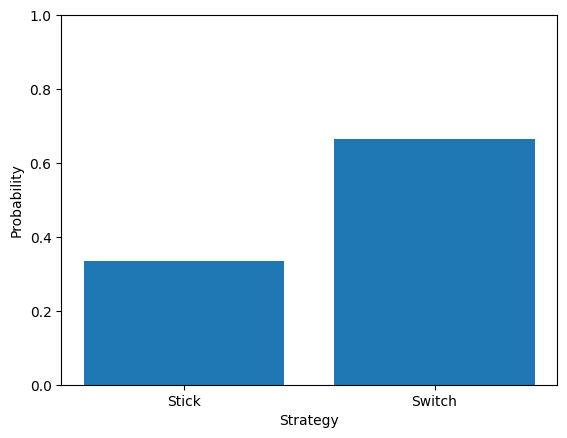

In [32]:
import matplotlib.pyplot as plt

# Graph those probabilities now
probabilities = [stick_prob, switch_prob]
labels = ['Stick', 'Switch']

plt.bar(labels, probabilities)
plt.xlabel('Strategy')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show()

**Problem 2 - Getting the integral value**

In [ ]:
def f(x):
  return x * np.cos(71 * x) + np.sin(13 * x)

In [ ]:
# using custom monte_carlo_integration method

def monte_carlo_integration(f, a, b, points):
    total = 0
    i = 0
    while i < points:
        x = np.random.uniform(a, b)
        total += f(x)
        i += 1
    integral_approx = (b - a) * (total / points)
    return integral_approx

In [ ]:
integ = monte_carlo_integration(f, 0, 1, 1000000)
print(integ)

0.020746079923212705


In [ ]:
# using method from chap4 notes
def monte_carlo_uniform(func, a, b, n):
  """
  Monte carlo integration with more uniform spread (forced)
  """
  subsets = np.arange(0, n+1, n/10)
  u =np.zeros(n)
  for i in range(10):
    start = int(subsets[i])
    end = int(subsets[i+1])
    u[start:end] = np.random.uniform(low=i/10, high=(i+1)/10, size=end-start)

  np.random.shuffle(u)
  u_func = func(a+(b-a)*u)
  s=((b-a)/n)*u_func.sum()
  return s

In [ ]:
integ2 = monte_carlo_uniform(f, 0, 1, 1000000)
print(integ2)

0.02033888492193216


In [ ]:
# using scipy library
from scipy import integrate
results, err = integrate.quad(f, 0, 1)
print(results)
print(err)

0.02025493910239419
1.1076454573754196e-14


In [ ]:
# using sympy library
from sympy import sin, cos, symbols, integrate
x = symbols('x')
integrate(x * cos(71 * x) + sin(13 * x), (x, 0, 1)).evalf(6)

0.0202549